# RBF neural net

In [22]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import torch

In [31]:
# cpg model parameters
MI = 0.02
b1 = 0.01
b2 = 0.01
w11 = 1.4
w12 = 0.18 + MI
w21 = -0.18 - MI
w22 = 1.4
o1 = 0.01
o2 = 0.01
# W = [[w11,w21],[w12,w22]]
# O = [o1, o2]

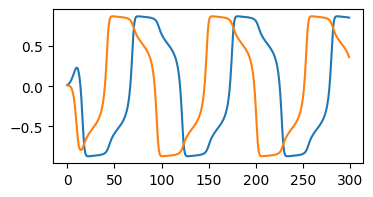

In [32]:
# cpg running
cpg_out = []
for i in range(300):
    o1 = tanh(o1*w11 + o2*w12 )
    o2 = tanh(o2*w22 + o1*w21 )
    cpg_out.append([o1, o2])
cpg_out = np.array(cpg_out)
plt.figure(figsize=(4,2))
plt.plot(cpg_out[:,0])
plt.plot(cpg_out[:,1])
# cpg_out

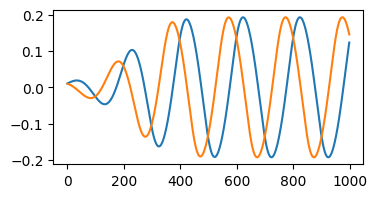

In [33]:
# SO2 oscillator from paper
cpg_out = []
omega = 0.01*pi
o1, o2 = 0.01, 0.01
for i in range(1000):
    o1 = tanh(1.01*( o1*cos(omega) + o2*sin(omega)))
    o2 = tanh(1.01*(-o1*sin(omega) + o2*cos(omega)))
    cpg_out.append([o1, o2])
cpg_out = np.array(cpg_out)
plt.figure(figsize=(4,2))
plt.plot(cpg_out[:,0])
plt.plot(cpg_out[:,1])
# cpg_out

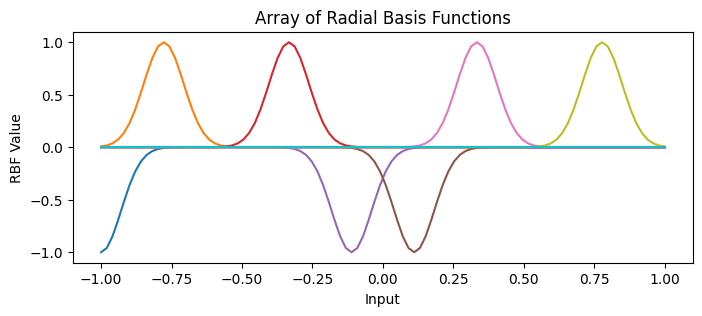

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def generate_rbf_array(input_range, num_basis, centers, widths, weights):
    """
    Generates an array of Radial Basis Functions (RBFs) over a given input range.

    Args:
        input_range (tuple): Range of the input values (e.g., (0, 1)).
        num_basis (int): Number of basis functions.
        centers (ndarray): Array of centers for the basis functions.
        widths (ndarray): Array of widths for the basis functions.

    Returns:
        ndarray: Array of RBFs evaluated over the input range.
    """
    x = np.linspace(input_range[0], input_range[1], num=100)
    rbf_array = np.zeros((num_basis, len(x)))

    for i in range(num_basis):
        rbf_array[i] = weights[i]*np.exp(-widths[i] * (x - centers[i]) ** 2)

    return rbf_array

# Example usage
input_range = (-1, 1)
num_basis = 10
centers = np.linspace(input_range[0], input_range[1], num=num_basis)
widths = np.ones(num_basis) * 100
weights = np.random.randint(input_range[0], input_range[1]+1, 10,)

rbf_array = generate_rbf_array(input_range, num_basis, centers, widths, weights)

# Plotting the RBFs
plt.figure(figsize=(8, 3))
for i in range(num_basis):
    plt.plot(np.linspace(input_range[0], input_range[1], num=100), rbf_array[i], label=f'RBF {i+1}')
plt.xlabel('Input')
plt.ylabel('RBF Value')
plt.title('Array of Radial Basis Functions')
# plt.legend()
plt.show()

In [35]:
weights

array([-1,  1,  0,  1, -1, -1,  1,  0,  1,  0])

In [36]:
# cycle checker
T_step = 0
counter = 0
o1_p = 0
# for i in range(10000):
#     o1 = math.tanh(o1*w11 + o2*w12 )
#     o2 = math.tanh(o2*w22 + o1*w21 )
cpg_out = []
omega = 0.01*pi
o1, o2 = 0.01, 0.01
cpg_out = []
# Rbf network
input_range = (-1, 1)
num_basis = 10
centers = np.linspace(input_range[0], input_range[1], num=num_basis)
widths = np.ones(num_basis) * 100
x = np.linspace(input_range[0], input_range[1], num=100)
# weights = np.arange(input_range[0], input_range[1], 0.1)
rbf_array = np.zeros((num_basis, len(x)))
T_step = 201
phase = 0 # phase of oscillator
phase_array = []
for step in range(376):
    o1 = tanh(1.01*( o1*cos(omega) + o2*sin(omega)))
    o2 = tanh(1.01*(-o1*sin(omega) + o2*cos(omega)))

for step in range(600):
    o1 = tanh(1.01*( o1*cos(omega) + o2*sin(omega)))
    o2 = tanh(1.01*(-o1*sin(omega) + o2*cos(omega)))
    # phase = counter/T_step
    # print(t)
    # phase_array.append(phase)
    # cpg_out.append(o1)
    # counter += 1
    if o1_p < 0 and o1 > 0:
        T_step = counter
        print('T_step', T_step)
        print(T_step)
        print(o1_p, o1)
        print('cpg_out: ', len(cpg_out))
        print('phase_array: ', len(phase_array))
        # print('x: ', x)
        # RBF function
        rbf_array = np.zeros((num_basis, T_step))
        print('rbf_array: ', rbf_array.shape)
        for i in range(num_basis):
            rbf_array[i] = np.exp(-widths[i] * (phase_array - centers[i]) ** 2)
        counter = 0
        # Plotting the RBFs
        # plt.figure(figsize=(8, 3))
        # for i in range(num_basis):
        #     plt.plot(np.linspace(input_range[0], input_range[1], num=len(phase_array)), rbf_array[i], label=f'RBF {i+1}')
        # plt.plot(phase_array, np.sum(rbf_array, axis=0))
        # plt.plot(phase_array, cpg_out)
        # plt.xlabel('Input')
        # plt.ylabel('RBF Value')
        # plt.title('Array of Radial Basis Functions')
        # # plt.legend()
        # plt.show()
        cpg_out = []
        phase_array = []
    o1_p = o1


T_step 0
0
-0.002037866758872288 0.004020559159657686
cpg_out:  0
phase_array:  0
rbf_array:  (10, 0)
T_step 0
0
-0.004769327652237066 0.0012807960533901212
cpg_out:  0
phase_array:  0
rbf_array:  (10, 0)


o1, o2:  0.010411888659894014 0.009764390139326064
o1, o2:  0.01082017021613351 0.00951361222728827
o1, o2:  0.011224326102836102 0.00924765313274609
o1, o2:  0.011623832459260632 0.008966516029487436
o1, o2:  0.012018160623900665 0.00867022070313843
o1, o2:  0.012406777643953133 0.008358803847192951
o1, o2:  0.012789146799752842 0.008032319347709338
o1, o2:  0.01316472814372663 0.007690838556213438
o1, o2:  0.0135329790533844 0.007334450550337976
o1, o2:  0.01389335479782875 0.006963262381717988
o1, o2:  0.014245309117230534 0.006577399310650754
o1, o2:  0.014588294814684486 0.006177005027016458
o1, o2:  0.01492176435982755 0.005762241856942833
o1, o2:  0.015245170503572764 0.005333290954683206
o1, o2:  0.015557966903283793 0.004890352479163
o1, o2:  0.015859608757689554 0.004433645754634932
o1, o2:  0.01614955345081524 0.003963409414867971
o1, o2:  0.016427261204185334 0.0034799015302798817
o1, o2:  0.01669219573653629 0.0029833997174080404
o1, o2:  0.01694382493026145 0.002474201230

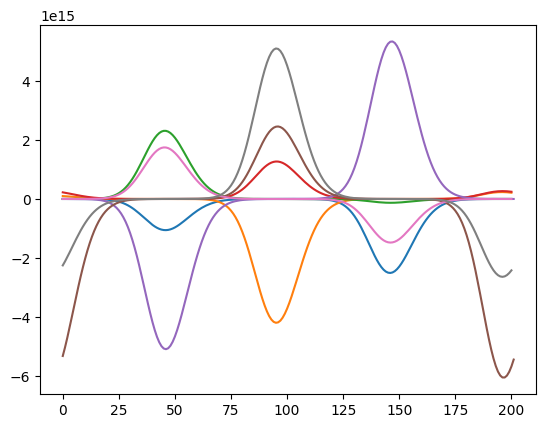

In [37]:
# RBF network re-produce paper
T_step = 0
counter = 0
o1_p = 0
# for i in range(10000):
#     o1 = math.tanh(o1*w11 + o2*w12 )
#     o2 = math.tanh(o2*w22 + o1*w21 )
cpg_out = []
omega = 0.01*pi
o1, o2 = 0.01, 0.01
cpg_out = []
# Rbf network
input_range = (-1, 1)
num_basis = 20
num_output = 2
centers = np.linspace(input_range[0], input_range[1], num=num_basis)
# widths = np.ones(num_basis) * 100
variance = 1/0.04
x = np.linspace(input_range[0], input_range[1], num=100)
# weights = np.arange(input_range[0], input_range[1], 0.1)
# weights = np.random.randint(input_range[0], input_range[1]+1, num_basis,)
weights = np.random.randn(num_output, num_basis)

# rbf_array = np.zeros((num_basis, len(x)))
rbf_array = []
T_step = 201
phase = 0 # phase of oscillator
phase_array = []
for step in range(376):
    o1 = tanh(1.01*( o1*cos(omega) + o2*sin(omega)))
    o2 = tanh(1.01*(-o1*sin(omega) + o2*cos(omega)))
    print('o1, o2: ', o1, o2)

for step in range(1000):
    o1 = tanh(1.01*( o1*cos(omega) + o2*sin(omega)))
    o2 = tanh(1.01*(-o1*sin(omega) + o2*cos(omega)))
    cpg_out = [[o1], [o2]]
    # print('o1', o1)
    rbf_array.append(np.sum(weights*np.exp(variance*(cpg_out - centers) ** 2), axis=1))
    
    if o1_p < 0 and o1 > 0:
        counter = 0
        plt.plot(rbf_array)
        rbf_array = []
        weights = np.random.randn(num_output, num_basis)
        # print('weights: ', weights)
    o1_p = o1


In [1]:
from rbf_neural_net import RBFNet

In [2]:
model = RBFNet(1)

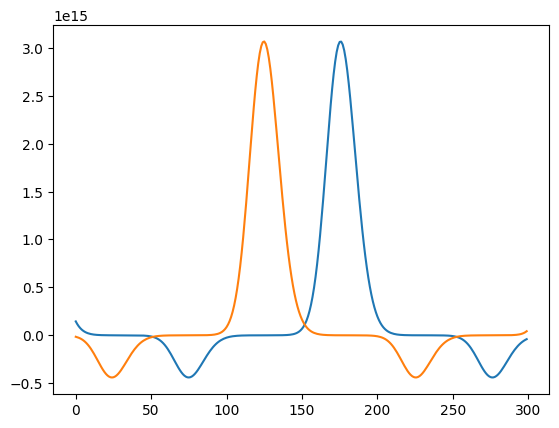

In [18]:
output = []
for i in range(300):
    output.append(model.forward())
    # print('output: ', output)
plt.plot(output)

### Test RBF GPU version

In [256]:
POPSIZE = 2
omega = 0.01*np.pi
o1 = torch.Tensor.repeat(torch.Tensor([0.00]), POPSIZE).unsqueeze(1)
o2 = torch.Tensor.repeat(torch.Tensor([0.18]), POPSIZE).unsqueeze(1)
O = torch.Tensor([[0.01, 0.18]]).expand(POPSIZE, 2)
# Rbf network
input_range = (-1, 1)
num_basis = 10
num_output = 1
centers = torch.linspace(input_range[0], input_range[1], num_basis)
variance = 1/0.04
weights = torch.randn(POPSIZE, num_output, num_basis, )
rbf_array = []
W = torch.Tensor([[ cos(omega) ,  -sin(omega)], 
                  [ sin(omega) ,  cos(omega)]])

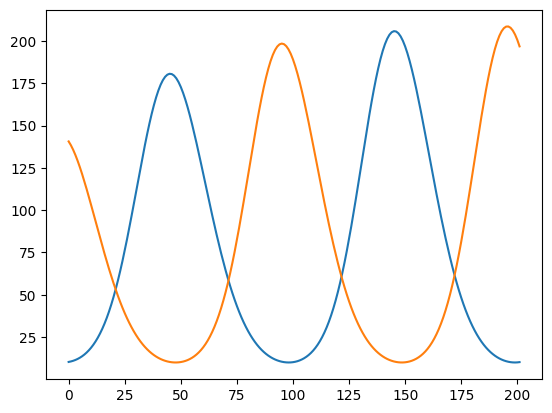

In [257]:
output = []
with torch.no_grad():
    for i in range(202):
        # o1 = torch.tanh(1.01*( o1p*cos(omega) + o2p*sin(omega)))
        # o2 = torch.tanh(1.01*(-o1p*sin(omega) + o2p*cos(omega)))
        O = torch.tanh(1.01*torch.matmul(O, W))
        # print('o1', o1)
        # posto1 = torch.sum(weights[0]*np.exp(variance*(o1 - centers)), dim=1)
        # posto2 = torch.sum(weights[1]*np.exp(variance*(o2 - centers)), dim=1)
        post = torch.sum(
                np.exp(variance*
                       torch.einsum('p,qr->pqr', centers, O))
                                , dim=0)
        
        # cpg_out = torch.stack([posto1,posto2])
        output.append(post.tolist())
        o1p = o1
        o2p = o2
plt.plot(np.array(output)[:,0,0])
plt.plot(np.array(output)[:,0,1])
# plt.plot(output[:,1:2])

In [234]:
output

[[[-4.656612873077393e-10, -1.4901161193847656e-08],
  [-4.656612873077393e-10, -1.4901161193847656e-08]],
 [[3.4924596548080444e-10, 1.4901161193847656e-08],
  [3.4924596548080444e-10, 1.4901161193847656e-08]],
 [[1.3969838619232178e-09, -1.4901161193847656e-08],
  [1.3969838619232178e-09, -1.4901161193847656e-08]],
 [[9.313225746154785e-10, 0.0], [9.313225746154785e-10, 0.0]],
 [[1.862645149230957e-09, 0.0], [1.862645149230957e-09, 0.0]],
 [[1.862645149230957e-09, 1.4901161193847656e-08],
  [1.862645149230957e-09, 1.4901161193847656e-08]],
 [[3.725290298461914e-09, 2.9802322387695312e-08],
  [3.725290298461914e-09, 2.9802322387695312e-08]],
 [[-3.725290298461914e-09, 1.4901161193847656e-08],
  [-3.725290298461914e-09, 1.4901161193847656e-08]],
 [[0.0, -2.9802322387695312e-08], [0.0, -2.9802322387695312e-08]],
 [[-7.450580596923828e-09, -1.4901161193847656e-08],
  [-7.450580596923828e-09, -1.4901161193847656e-08]],
 [[-1.862645149230957e-08, 1.4901161193847656e-08],
  [-1.862645149230

In [195]:
O = torch.tanh(1.01*torch.matmul(O, W))
O

tensor([[-0.1407,  0.1404],
        [-0.1407,  0.1404]])

In [224]:
centers

tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000])

In [231]:
# torch.einsum('bp,bqr->bpqr', v, M) # batch-wise operation v.shape=(b,p) M.shape=(b,q,r)
# torch.einsum('p,qr->pqr', v, M)    # cross-batch operation

torch.sum(torch.einsum('p,qr->pqr', centers, O), dim=0)    # cross-batch operation


tensor([[0.0000e+00, 1.4901e-08],
        [0.0000e+00, 1.4901e-08]])